# 제주 예비창업자를 위한 업종별 카드 매출과 매장수 데이터 분석

In [18]:
%ls ../../datasets/

1_제주 예비창업자를 위한 업종별 카드 매출과 매장수 데이터 활용.csv
3_상권분석을 위한 유동인구에 따른 카드 매출액 변화 데이터 활용.csv
5_제주 전기버스 우선도입노선 파악을 위한 데이터(2020.4).csv
9_제주 관광을 위한 날짜별 지역 추천 데이터.csv
jeju_sujin.csv
제주특별자치도 서귀포시_경제활동별지역내총생산현황_20201231.csv
제주특별자치도_개별관광(FIT)_증가에_따른_제주_관광객_소비패턴_변화_분석_BC카드_빅데이터_내국인관광객_20170216.csv
제주특별자치도_제주도장소(POI)데이터_20151231.csv


In [19]:
filepath = '../../datasets/jeju_sujin.csv'

## 필요 라이브러리 불러오기

In [328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

In [21]:
pd.options.display.max_columns = 100
pd.options.display.float_format = lambda x: '%.3f' % x

In [36]:
plt.rc('font', family='AppleGothic')

## 데이터 불러오기

In [23]:
df_card = pd.read_csv(filepath)
df_card.head()

,연도,월,분기,시도명,지역구분,읍면동명,업종명 대분류,업종명,이용자 구분,관광구분,연령대,성별,이용금액,매장수
0,2017,1,1,서귀포시,도심,강정동,소매업,슈퍼마켓,제주도민,도민,50.000,여성,365160,214
1,2017,1,1,제주시,도심,삼도일동,숙박업,여관업,제주도민,도민,60.000,여성,40000,1610
2,2017,1,1,제주시,도심,삼양이동,숙박업,여관업,제주도민,도민,20.000,여성,162000,1610
3,2017,1,1,제주시,도심,삼양이동,숙박업,여관업,제주도민,도민,50.000,남성,70000,1610
4,2017,1,1,제주시,도심,삼도이동,숙박업,여관업,내국인,개별,40.000,남성,3150460,1610


In [24]:
df_card.shape

(1496856, 14)

# 분석 계획
(데이터 행 == 결제 건)이 아니라서 변수 분석만 가지고는 인사이트 도출할 수 없음 ㅠ
groupby사용해서 데이터프레임 서브셋 여러 개 만들어서 봐야 할 듯


1. 인기 업종 분석
  * 이용 금액이 높은 업종 
      - 주로 음식점, 소매업!!
      - 면세점 ** 
  * 매장 수 대비 이용 금액
      - 가성비(?) 높은 업종 골라낼 수 있지 않을까
      - ex) 돈많은 사람의 지갑 열기
      - 마케팅 전략을 몇가지 찾아보고 타당한 지 파악하는 방식
  
2. 이용자 구분 분석
  * 이용 금액이 높은 연령대, 성별, 국적 등  
      - 생각보다 외국인 관광객 데이터 비율이 적음
      - 아직 매출액으로는 분석을 안 해봐서 매출액으로 비교해 볼 예정
 
 
3. 계절에 따른 이용 금액
  

## 유동인구가 높은 지역 TOP5

연동, 애월읍, ----

# 인기 업종 분석

## 이용 금액이 높은 업종

### 업종별 이용금액 및 매장수: df_industry

In [166]:
# 연도별, 업종별 이용금액
df_store_expense_year = df_card.groupby(['연도',  
                                    '시도명', 
                                    '업종명 대분류', 
                                    '업종명'
                                   ])[['이용금액']].mean().reset_index()
df_store_count_year = df_card.groupby(['연도', 
                                  '시도명', 
                                  '업종명 대분류', 
                                  '업종명'
                                 ])[['매장수']].mean().reset_index()

In [167]:
# 업종별 매장수
df_store_count = df_card.groupby(['연도', 
                                  '월', 
                                  '시도명', 
                                  '업종명 대분류', 
                                  '업종명'
                                 ])[['매장수']].mean().reset_index()

In [168]:
# 업종별 이용금액 및 매장수
df_industry = pd.concat([df_store_expense_year, df_store_count_year['매장수']], axis=1)
df_industry.head()

,연도,시도명,업종명 대분류,업종명,이용금액,매장수
0,2017,서귀포시,서비스업,골프장 운영업,10063551.138,17.000
1,2017,서귀포시,서비스업,그외 기타 분류안된 오락관련 서비스업,155818.107,6.770
2,2017,서귀포시,서비스업,그외 기타 스포츠시설 운영업,389374.055,18.215
3,2017,서귀포시,서비스업,기타 갬블링 및 베팅업,24452666.667,3.000
4,2017,서귀포시,서비스업,기타 수상오락 서비스업,432655.172,13.552


In [163]:
df_industry.groupby('업종명 대분류')[['이용금액']].mean().sort_values(by='이용금액', ascending=False)

,이용금액
업종명 대분류,
운송업,22317247.295
서비스업,8768492.350
소매업,5888822.319
숙박업,4184165.769
음식점업,2567807.363
임대업,2179495.601


### 업종별 매장수 변화 추이

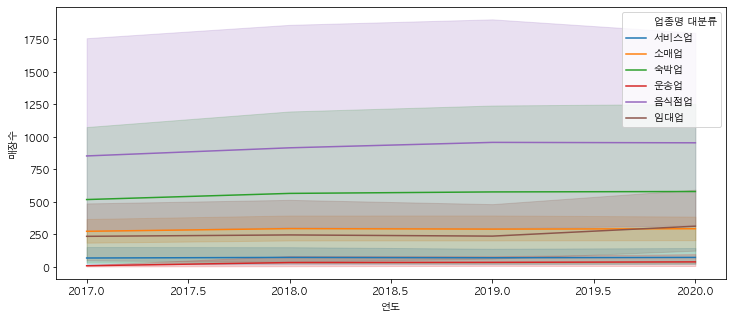

In [305]:
plt.figure(figsize=(12,5))
sns.lineplot(x='연도', y='매장수', data=df_industry, hue='업종명 대분류')

### 업종명 대분류별 이용금액 변화 추이

**운송업**: 코로나 이전에도 점점 줄어드는 추세를 보이고 있었으며, 2019년 말 ~ 2020년 초 코로나가 터지면서 급 하강

**소매업, 숙박업, 음식점업, 임대업**: 미미하게 감소하는 추세

**서비스업**: 유일하게 점점 증가하는 추세를 보임.

*결론: 서비스업 종류를 살펴보고 전망 좋은 업종 추천*

Text(0.5, 1.0, '업종 대분류별 이용금액')

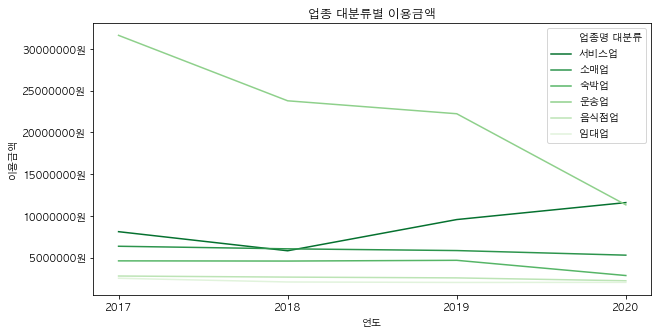

In [371]:
plt.figure(figsize=(10,5))
plt.ticklabel_format(style='plain', useOffset=False, )
plt.xticks(np.arange(2017, 2021, step=1))
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f원'))
ax = sns.lineplot(x='연도', y='이용금액', data=df_industry, hue='업종명 대분류', ci=None, palette='Greens_r')
ax.set_title('업종 대분류별 이용금액')

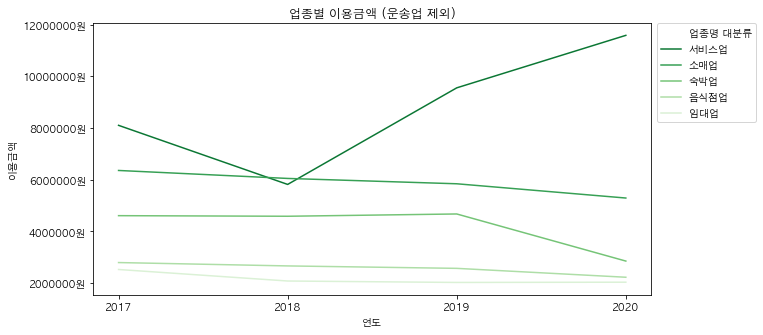

In [370]:
# 운송업 이용금액이 너무 커서 제외하고 보기
transit_idx = df_industry['업종명 대분류']=='운송업'
df_industry_new = df_industry[~transit_idx]

plt.figure(figsize=(10,5))
plt.ticklabel_format(style='plain', useOffset=False, )
plt.xticks(np.arange(2017, 2021, step=1))
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f원'))
ax = sns.lineplot(x='연도', y='이용금액', data=df_industry_new, hue='업종명 대분류', ci=None, palette='Greens_r')
ax.set_title('업종별 이용금액 (운송업 제외)')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)


### 서비스업 이용금액 변화 추이

서비스업이 유일하게 이용금액이 계속 증가하여 소분류를 살펴봄.

그 결과 **기타 갬블링 및 베팅업**에서 뚜렷한 증가세를 보임

[제주 카지노 산업 현황](https://ijto.or.kr/korean/Bd/download.php?btable=pds&bno=308&fidx=1)

[제주도 카지노산업 활성화·건전성 강화, 두 마리 토끼 잡는다](http://www.jejudonews.com/article.php?aid=656448703)

> 한국에 갇힌(?) 중국인들이 도박많이함 ; ; 

In [92]:
df_service = df_industry[df_industry['업종명 대분류'] == '서비스업']

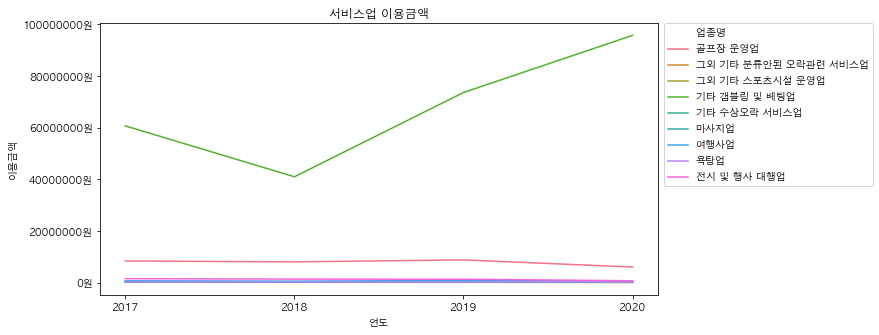

In [403]:
plt.figure(figsize=(10,5))
plt.ticklabel_format(style='plain', useOffset=False, )
plt.xticks(np.arange(2017, 2021, step=1))
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f원'))
ax = sns.lineplot(x='연도', y='이용금액', data=df_service, hue='업종명', ci=None)
ax.set_title('서비스업 이용금액')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
# plt.setp(ax.get_legend().get_texts(), fontsize='10')
plt.show()

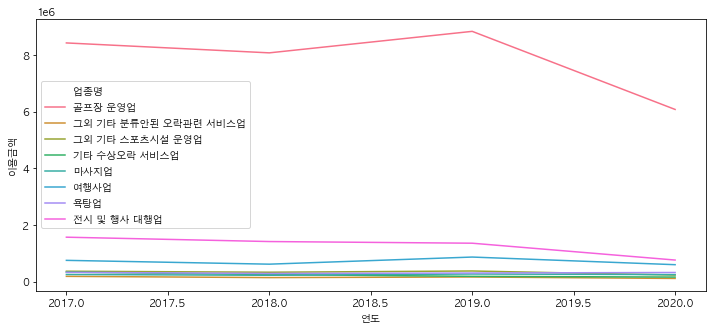

In [378]:
# 이번에도 갬블링 및 베팅업이 이용금액이 너무 커서 제외하고 보기 
gambling_idx = df_service['업종명']=='기타 갬블링 및 베팅업'
df_not_gambling = df_service[~gambling_idx]

plt.figure(figsize=(12,5))
sns.lineplot(x='연도', y='이용금액', data=df_not_gambling, hue='업종명', ci=None)

기타 겜블링 및 베팅업을 제외한 업종은 모두 이용금액에 있어 **감소세**를 보임

In [349]:
sns.color_palette("YlOrBr")

[(0.9994925028835063, 0.9584775086505191, 0.7154325259515572),
 (0.996078431372549, 0.8549173394848135, 0.493517877739331),
 (0.996078431372549, 0.6978700499807766, 0.24727412533640908),
 (0.9551095732410612, 0.5066820453671664, 0.11298731257208766),
 (0.8364167627835448, 0.3390080738177624, 0.028327566320645904),
 (0.6258823529411764, 0.21610149942329873, 0.01467128027681661)]

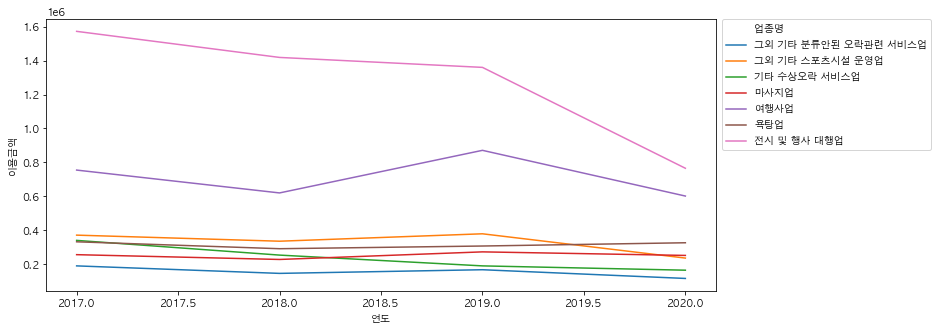

In [356]:
# 골프장 운영업 이용금액이 너무 커서 제외하고 보기 
golf_idx = df_not_gambling['업종명']=='골프장 운영업'
df_not_gambling_nor_golf = df_not_gambling[~golf_idx]

plt.figure(figsize=(12,5))
sns.color_palette("YlOrBr")
sns.lineplot(x='연도', y='이용금액', data=df_not_gambling_nor_golf, hue='업종명', ci=None)
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)


## 코로나 이후 업종별 매장수 변화 추이
2020년 1월 이후 데이터를 살펴본다.

In [113]:
df_corona = df_card[df_card['연도']==2020].copy()

In [164]:
# 연도별, 업종별 이용금액
df_store_expense_corona = df_corona.groupby(
    [
        '월',  
        '시도명', 
        '업종명 대분류', 
        '업종명'
    ])[['이용금액']].mean().reset_index()
df_store_count_corona = df_corona.groupby(
    [
        '월', 
        '시도명', 
        '업종명 대분류', 
        '업종명'
    ])[['매장수']].mean().reset_index()

In [165]:
df_industry_corona = pd.concat([
                        df_store_expense_corona, 
                        df_store_count_year_corona['매장수']
                        ], axis=1)

### 업종명 대분류별 이용금액 변화 추이
서비스업과 운송업에 대한 이용금액이 급 하강함.
이 두 분류를 제외한 분류를 살펴보자.

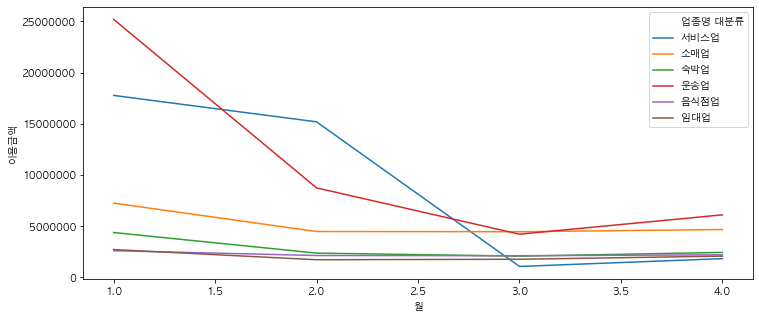

In [128]:
plt.figure(figsize=(12,5))
plt.ticklabel_format(style='plain', useOffset=False)
sns.lineplot(x='월', 
             y='이용금액', 
             data=df_industry_corona, 
             hue='업종명 대분류', 
             ci=None)

모두 감소세를 보이다가 2월 이후로 약간의 상승세를 보임. 좀 더 자세히 살펴보자

In [119]:
corona_service_idx = df_industry_corona['업종명 대분류']=='서비스업'
corona_transit_idx = df_industry_corona['업종명 대분류']=='운송업'
corona_service_and_transit_idx = corona_service_idx | corona_transit_idx

In [129]:
df_corona_not_service_nor_transit = df_industry_corona[~corona_service_and_transit_idx]
# df_corona_not_service_nor_transit.head()

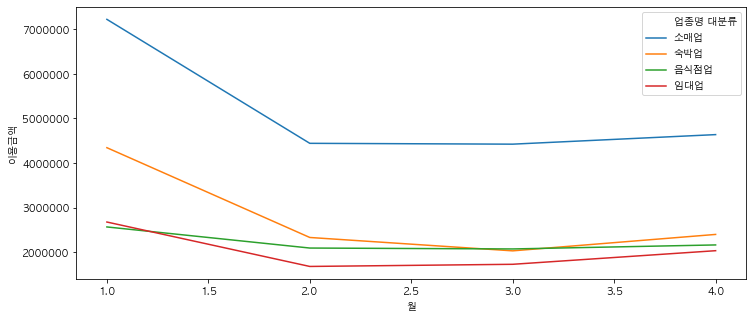

In [133]:
plt.figure(figsize=(12,5))
plt.ticklabel_format(style='plain', useOffset=False)
sns.lineplot(x='월', 
             y='이용금액', 
             data=df_corona_not_service_nor_transit, 
             hue='업종명 대분류', 
             ci=None)

음식점업에 대한 월별 이용금액 추이

감소 후 약간의 상승세를 보이나 뚜렷하게 나타나지는 않음... 결론을 내기에는 데이터가 더 필요함

In [136]:
df_corona_restaurant = df_corona[df_corona['업종명 대분류']=='음식점업']

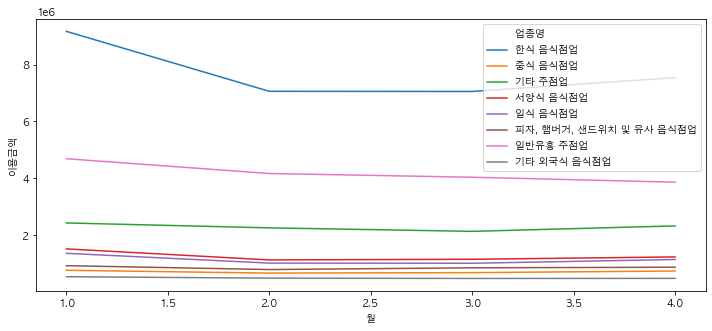

In [234]:
plt.figure(figsize=(12,5))
sns.lineplot(x='월', 
             y='이용금액', 
             data=df_corona_restaurant, 
             hue='업종명', 
             ci=None)

## 매장수 대비 이용금액 살펴보기 
일명 가성비 높은 업종 찾기

In [253]:
df_industry_mean = df_industry.groupby([
    '연도', '업종명 대분류', '업종명'
])[
    ['이용금액', '매장수']
].mean().reset_index()

df_industry_mean = df_industry_mean.rename(
    columns={
        '이용금액':'평균이용금액', 
        '매장수':'평균매장수'
    })

In [254]:
df_industry_mean['매장수대비이용금액'] = df_industry_mean['평균이용금액'] / df_industry_mean['평균매장수']

df_industry_mean = df_industry_mean.sort_values(
    by='매장수대비이용금액', 
    ascending=False
)

df_industry_mean.head()

,연도,업종명 대분류,업종명,평균이용금액,평균매장수,매장수대비이용금액
127,2020,서비스업,기타 갬블링 및 베팅업,95750000.000,3.000,31916666.667
86,2019,서비스업,기타 갬블링 및 베팅업,73632233.333,3.000,24544077.778
30,2017,운송업,정기 항공 운송업,118520220.607,5.000,23704044.121
71,2018,운송업,정기 항공 운송업,111820894.532,5.000,22364178.906
112,2019,운송업,정기 항공 운송업,105308267.442,5.000,21061653.488


제주도 기타 갬블링 및 베팅업의 이용금액이 꾸준히 증가함. 

매장수대비 이용금액이 2018년에 감소한 것으로 보아 대규모 카지노가 들어선 것이 이유인 듯함.

In [175]:
df_industry_mean_jeju = df_industry[df_industry['시도명']=='제주시'].copy()
# df_industry_jeju['매장수대비이용금액'] = df_industry_jeju['이용금액'] / df_industry_jeju['매장수']
df_industry_jeju[df_industry_jeju['업종명']=='기타 갬블링 및 베팅업']

,연도,시도명,업종명 대분류,업종명,이용금액,매장수,매장수대비이용금액
42,2017,제주시,서비스업,기타 갬블링 및 베팅업,96976291.294,3.706,26168205.587
122,2018,제주시,서비스업,기타 갬블링 및 베팅업,72460952.381,4.000,18115238.095
204,2019,제주시,서비스업,기타 갬블링 및 베팅업,119464466.667,4.000,29866116.667
283,2020,제주시,서비스업,기타 갬블링 및 베팅업,181500000.000,4.000,45375000.000


Text(0.5, 1.0, '제주시 연도별 갬블링 및 베팅업 매장수대비이용금액')

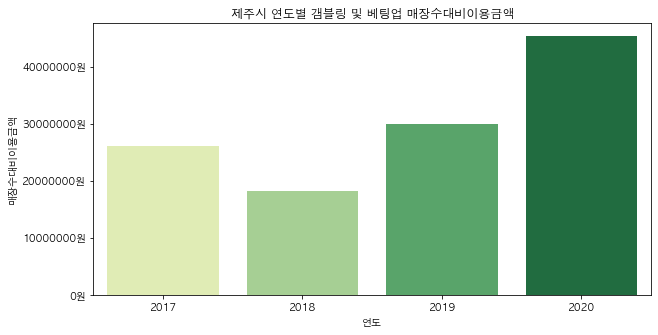

In [344]:
df_jeju_casino = df_industry_jeju[
    df_industry_jeju['업종명']=='기타 갬블링 및 베팅업'
]

plt.figure(figsize=(10,5))
plt.ticklabel_format(style='plain', useOffset=False, )
plt.xticks(np.arange(2017, 2021, step=1))
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f원'))

ax = sns.barplot(x='연도', 
                 y='매장수대비이용금액', 
                 data=df_jeju_casino, 
                 palette='YlGn')
ax.set_title('제주시 연도별 갬블링 및 베팅업 매장수대비이용금액')

Text(0.5, 1.0, '제주시 연도별 갬블링 및 베팅업 이용금액')

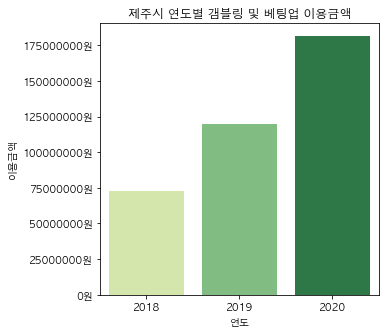

In [404]:
df_jeju_casino = df_industry_jeju[
    (df_industry_jeju['업종명']=='기타 갬블링 및 베팅업')
    &
    (df_industry_jeju['연도'] > 2017)
]

plt.figure(figsize=(5,5))
plt.ticklabel_format(style='plain', useOffset=False, )
plt.xticks(np.arange(2017, 2021, step=1))
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f원'))

ax = sns.barplot(x='연도', 
                 y='이용금액', 
                 data=df_jeju_casino, 
                 palette='YlGn')
ax.set_title('제주시 연도별 갬블링 및 베팅업 이용금액')

정기 항공 운송업 ==> 코로나 이후 가장 큰 영향 

모든 업종이...... 매출액이 감소해.........어떡해...........

적게 감소하는거 . . . . . . . . . 

이용금액대비매장수

관광객이 늘고있다~~!~!!~~ 
관광객이 선호하는 업종

코로나 전/후로 두 가지 분석 결과 도출

# 이용자 구분 분석
 * 이용 금액이 높은 연령대, 성별, 국적 등  
      - 생각보다 외국인 관광객 데이터 비율이 적음
      - 아직 매출액으로는 분석을 안 해봐서 매출액으로 비교해 볼 예정

중국인에 대한 데이터가 너무 부족.. 
* 하지만 괜찮아 
* 그래도 6만개 줄이 있음. 그리고 비율은 살필 수 있을 거야

In [33]:
df_card.head()

,연도,월,분기,시도명,지역구분,읍면동명,업종명 대분류,업종명,이용자 구분,관광구분,연령대,성별,이용금액,매장수
0,2017,1,1,서귀포시,도심,강정동,소매업,슈퍼마켓,제주도민,도민,50.000,여성,365160,214
1,2017,1,1,제주시,도심,삼도일동,숙박업,여관업,제주도민,도민,60.000,여성,40000,1610
2,2017,1,1,제주시,도심,삼양이동,숙박업,여관업,제주도민,도민,20.000,여성,162000,1610
3,2017,1,1,제주시,도심,삼양이동,숙박업,여관업,제주도민,도민,50.000,남성,70000,1610
4,2017,1,1,제주시,도심,삼도이동,숙박업,여관업,내국인,개별,40.000,남성,3150460,1610


In [236]:
yukjiin_idx = df_card['이용자 구분'] == '내국인'
jejuin_idx = df_card['이용자 구분'] == '제주도민'
korean_idx = yukjiin_idx | jejuin_idx
df_korean = df_card[idx].sample(6557, random_state=234)
# df_korean
df_foreign = df_card[~idx]
df_people = pd.concat([df_foreign, df_korean], axis=0).reset_index(drop=True)
df_people.head()

,연도,월,분기,시도명,지역구분,읍면동명,업종명 대분류,업종명,이용자 구분,관광구분,연령대,성별,이용금액,매장수
0,2017,1,1,제주시,도심,연동,숙박업,여관업,중국,단체,nan,NaN,74000,1610
1,2017,1,1,제주시,도심,노형동,음식점업,한식 음식점업,중국,단체,nan,NaN,2737000,6259
2,2017,1,1,제주시,도심,건입동,음식점업,한식 음식점업,중국,단체,nan,NaN,218550,6259
3,2017,1,1,제주시,도심,연동,숙박업,여관업,중국,개별,nan,NaN,1667620,1610
4,2017,1,1,제주시,도심,연동,숙박업,여관업,동남아,개별,nan,NaN,324000,1610


내국인 수와 외국인 데이터 개수가 너무 차이가 나니까, 인원수가 같다고 했을 때 이용금액이 어떻게 차이가 나는 지 확인한다.

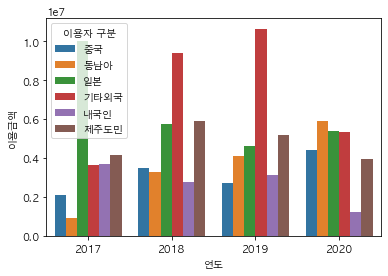

In [237]:
sns.barplot(x='연도', y='이용금액', data=df_people, hue='이용자 구분', ci=None)

# 분기에 따른 이용 금액 분석
  - 분기별 건수는 비슷비슷 ... 다른 분들도 그런가요 어케 분석하징
    - 3분기(성수기)
    - 분기마다 잘 되는 업종/안 되는 업종 
    - 전년도 분기랑 비교!!!
    
  * 마케팅 인사이트 도출

데이터가 잘못 됐나..... 분기별 매출이 차이가 안 남 ㅠ_ㅠ 

'3분기(성수기)가 매출이 높을 것이다'라는 가설 검증에는 아진님 데이터 사용해야 할 듯

In [243]:
df_quarter = df_card.groupby(['연도', '분기'])[['이용금액']].sum().reset_index()

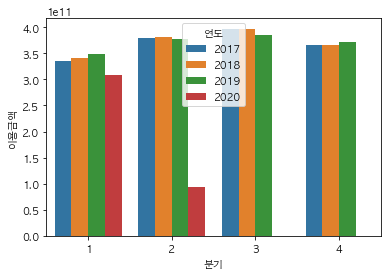

In [245]:
sns.barplot(x='분기', y='이용금액', data=df_quarter, hue='연도', ci=None)

# 갬블링 및 베팅업

샘플만 봐도 외국인 비율이 많을 것이라는 느낌이 확확 온다ㅏㅏㅏ 

In [198]:
df_casino = df_card[df_card['업종명']=='기타 갬블링 및 베팅업']
df_casino.sample(5)

,연도,월,분기,시도명,지역구분,읍면동명,업종명 대분류,업종명,이용자 구분,관광구분,연령대,성별,이용금액,매장수
700345,2018,8,3,제주시,도심,연동,서비스업,기타 갬블링 및 베팅업,일본,개별,nan,NaN,43500000,4
138905,2017,4,2,서귀포시,도심,색달동,서비스업,기타 갬블링 및 베팅업,기타외국,단체,nan,NaN,54000000,3
1052893,2019,5,2,제주시,도심,연동,서비스업,기타 갬블링 및 베팅업,일본,개별,nan,NaN,89000000,4
665881,2018,7,3,서귀포시,도심,색달동,서비스업,기타 갬블링 및 베팅업,일본,개별,nan,NaN,10000000,3
581842,2018,4,2,제주시,도심,연동,서비스업,기타 갬블링 및 베팅업,일본,개별,nan,NaN,73800000,4


## 내/외국인 카지노 이용률

...? 일본이 제일 많음 ....

Text(0.5, 1.0, '이용자 구분에 따른 결제 건수')

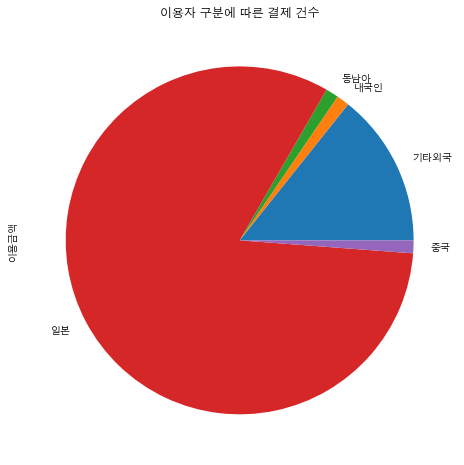

In [217]:
plt.figure(figsize=(12,8))
ax = df_casino.groupby('이용자 구분')['이용금액'].count().plot.pie()
ax.set_title("이용자 구분에 따른 결제 건수")

In [405]:
df_casino.groupby('이용자 구분')['이용금액'].count()

이용자 구분
기타외국    12
내국인      1
동남아      1
일본      69
중국       1
Name: 이용금액, dtype: int64

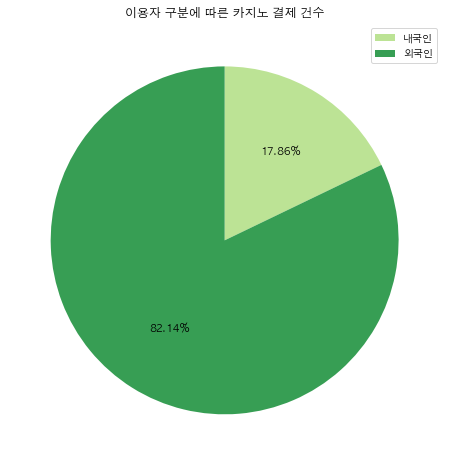

In [417]:
labels = ['내국인', '외국인'] ## 라벨
frequency = [15,69] ## 빈도
 
colors = sns.color_palette('YlGn',len(labels)) ## 라벨의 개수 만큼 색상 리스트 생성 
 
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
ax.set_title('이용자 구분에 따른 카지노 결제 건수')

pie = ax.pie(frequency, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.2f}%'.format(p), ## 퍼센티지 출력
       colors = colors ## 색상 지정
       )
 
plt.legend(pie[0],labels) ## 범례 표시
plt.show()

In [416]:
df_casino['이용자 구분'].value_counts()

일본      69
기타외국    12
동남아      1
중국       1
내국인      1
Name: 이용자 구분, dtype: int64

In [297]:
df_card['이용자 구분'].value_counts()

내국인     931950
제주도민    551514
중국        6557
기타외국      3908
일본        1625
동남아       1302
Name: 이용자 구분, dtype: int64

Text(0.5, 1.0, '이용자 구분에 따른 이용금액 합계')

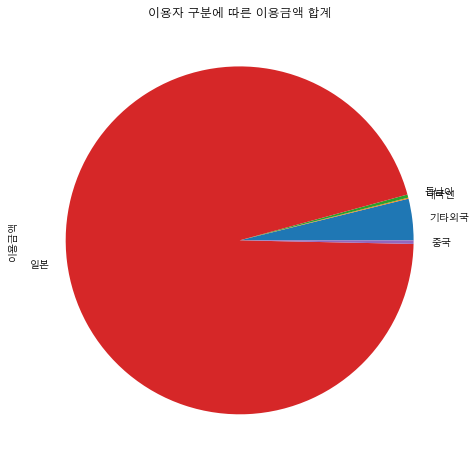

In [218]:
plt.figure(figsize=(12,8))
ax = df_casino.groupby('이용자 구분')['이용금액'].sum().plot.pie(figsize=(12,8))
ax.set_title('이용자 구분에 따른 이용금액 합계')

## 성별 카지노 이용률 

.....?......... zzzzzzzzzz
가설에 맞지 않는 데이터는 무시하자...
남성 100% 말안돼 ㅠ

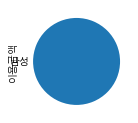

In [267]:
plt.figure(figsize=(2,2))
df_casino.groupby('성별')['이용금액'].sum().plot.pie()

## 분기별 카지노 이용률
* 1분기: 1,2,3월 
* 2분기: 4,5,6월
* 3분기: 7,8,9월
* 4분기: 10,11,12월

In [279]:
# 분기별 결제건수
df_casino_quarter = df_casino.groupby('분기')[['이용금액']].count().reset_index()
df_casino_quarter = df_quarter.rename(columns={'이용금액':'결제건수'})

Text(0.5, 1.0, '분기별 결제건수 합계')

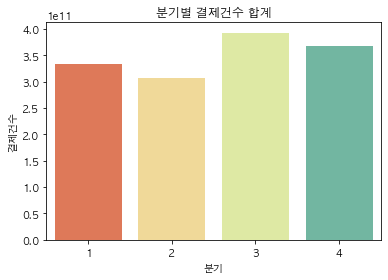

In [280]:
ax = sns.barplot(x='분기', 
                 y='결제건수', 
                 data=df_casino_quarter, 
                 palette='Spectral',
                 ci=None)
ax.set_title('분기별 결제건수 합계')

In [281]:
# 분기별 이용금액
df_casino_quarter = df_casino.groupby('분기')[['이용금액']].sum().reset_index()

Text(0.5, 1.0, '분기별 이용금액 합계')

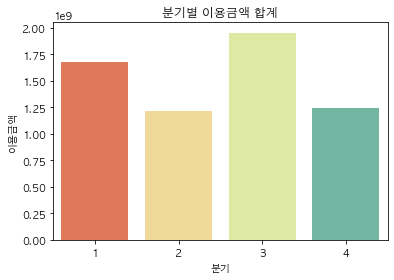

In [282]:
ax = sns.barplot(x='분기', 
                 y='이용금액', 
                 data=df_casino_quarter,
                 palette='Spectral',
                 ci=None)
ax.set_title('분기별 이용금액 합계')

## 연령대별 카지노 이용률
은 현재 데이터에서 알기 어려움!... 외국인에 대한 정보(연령대, 성별 등)가 없어서

## 카지노 위치?? 

삼도이동, 색달동, 연동에 있음!!~ 

이 위치는 피하면서 유동인구가 많은 위치에 ㄲㄲㄲㄲ

In [347]:
df_casino.groupby(['시도명','읍면동명']).mean()

연도     월    분기    연령대          이용금액   매장수
시도명  읍면동명                                                
서귀포시 색달동  2017.714 5.714 2.250    nan  20813928.571 2.786
제주시  삼도이동 2018.000 4.308 1.846 30.000  14235688.615 4.000
     연동   2018.093 6.186 2.419    nan 123760000.000 3.884

하연님께: 겜블링 및 베팅업 분포 시각화 가능??? ?

In [287]:
df_card.head()

,연도,월,분기,시도명,지역구분,읍면동명,업종명 대분류,업종명,이용자 구분,관광구분,연령대,성별,이용금액,매장수
0,2017,1,1,서귀포시,도심,강정동,소매업,슈퍼마켓,제주도민,도민,50.000,여성,365160,214
1,2017,1,1,제주시,도심,삼도일동,숙박업,여관업,제주도민,도민,60.000,여성,40000,1610
2,2017,1,1,제주시,도심,삼양이동,숙박업,여관업,제주도민,도민,20.000,여성,162000,1610
3,2017,1,1,제주시,도심,삼양이동,숙박업,여관업,제주도민,도민,50.000,남성,70000,1610
4,2017,1,1,제주시,도심,삼도이동,숙박업,여관업,내국인,개별,40.000,남성,3150460,1610


In [289]:
df_card[df_card['읍면동명']=='애월읍']

,연도,월,분기,시도명,지역구분,읍면동명,업종명 대분류,업종명,이용자 구분,관광구분,연령대,성별,이용금액,매장수
266,2017,1,1,제주시,읍면,애월읍,숙박업,여관업,내국인,단체,60.000,여성,236980,1610
267,2017,1,1,제주시,읍면,애월읍,숙박업,여관업,제주도민,도민,20.000,여성,1418200,1610
268,2017,1,1,제주시,읍면,애월읍,숙박업,여관업,제주도민,도민,50.000,남성,3450440,1610
269,2017,1,1,제주시,읍면,애월읍,숙박업,여관업,제주도민,도민,70.000,여성,42000,1610
271,2017,1,1,제주시,읍면,애월읍,숙박업,여관업,내국인,개별,40.000,남성,28633450,1610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496580,2020,4,2,제주시,읍면,애월읍,숙박업,여관업,내국인,개별,30.000,남성,15731727,2055
1496581,2020,4,2,제주시,읍면,애월읍,숙박업,여관업,내국인,개별,30.000,여성,12634105,2055
1496582,2020,4,2,제주시,읍면,애월읍,숙박업,여관업,내국인,개별,20.000,남성,6990515,2055
1496583,2020,4,2,제주시,읍면,애월읍,숙박업,여관업,내국인,개별,20.000,여성,8958342,2055
